In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVR
import warnings
import datetime

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-VCB.csv',delimiter=";")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,41700,40942,42003,40638,3.57M,+1.29%
2018-01-03,41624,42079,42230,41321,2.35M,-0.18%
2018-01-04,42003,41396,42003,41169,2.54M,+0.91%
2018-01-05,40942,41776,41776,40866,2.61M,-2.53%
2018-01-08,42003,40942,42079,40183,2.64M,+2.59%
...,...,...,...,...,...,...
2023-12-11,84200,85000,85300,84100,1.40M,-0.94%
2023-12-12,84200,84700,84700,84000,1.01M,0.00%
2023-12-13,83700,84200,84500,83700,1.15M,-0.59%


<Axes: xlabel='Date'>

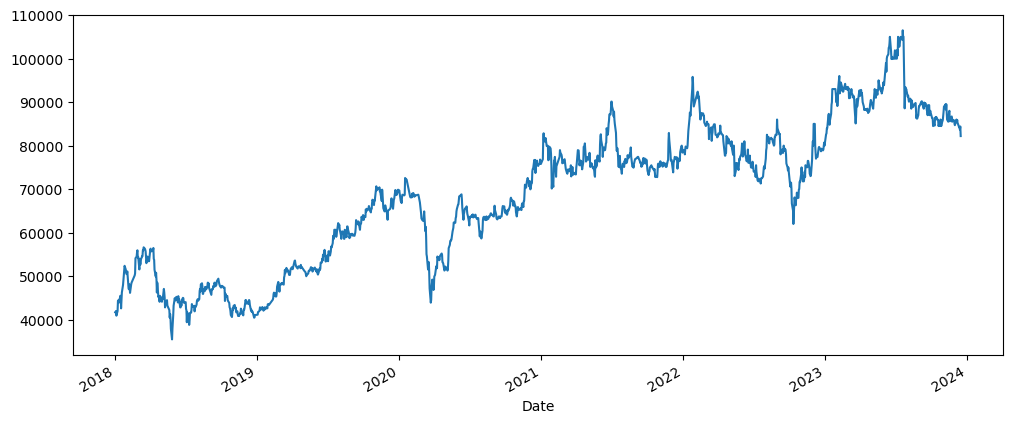

In [3]:
df['Price'].plot(figsize=(12,5))

In [40]:
#split training and testing data for SVR (7:3)
train_size1 = int(0.7 * len(df))

y = df[['Price']] 
X = df[['High']] 

y_train1 = y[:train_size1]
X_train1 = X[:train_size1]
y_test1 = y[train_size1:]
X_test1 = X[train_size1:]


In [41]:
#split training and testing data for SVR (8:2)
train_size2 = int(0.8 * len(df))

y = df[['Price']] 
X = df[['High']] 

y_train2 = y[:train_size2]
X_train2 = X[:train_size2]
y_test2 = y[train_size2:]
X_test2 = X[train_size2:]


In [42]:
#split training and testing data for SVR (9:1)
train_size3 = int(0.9 * len(df))

y = df[['Price']] 
X = df[['High']] 

y_train3 = y[:train_size3]
X_train3 = X[:train_size3]
y_test3 = y[train_size3:]
X_test3 = X[train_size3:]

In [43]:
#Creating SVR model (7:3)

svr_rbf1 = SVR(kernel='rbf', C=1000)
svr_rbf1.fit(X_train1, y_train1)

svr_poly1 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly1.fit(X_train1, y_train1)

svr_sigmoid1 = SVR(kernel='sigmoid')
svr_sigmoid1.fit(X_train1, y_train1)

SVR(kernel='sigmoid')

In [44]:
#Creating SVR model (8:2)

svr_rbf2 = SVR(kernel='rbf', C=1000)
svr_rbf2.fit(X_train2, y_train2)

svr_poly2 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly2.fit(X_train2, y_train2)

svr_sigmoid2 = SVR(kernel='sigmoid')
svr_sigmoid2.fit(X_train2, y_train2)

SVR(kernel='sigmoid')

In [45]:
#Creating SVR model (9:1)

svr_rbf3 = SVR(kernel='rbf', C=1000)
svr_rbf3.fit(X_train3, y_train3)

svr_poly3 = SVR(kernel='poly', C=1000, degree = 2)
svr_poly3.fit(X_train3, y_train3)

svr_sigmoid3 = SVR(kernel='sigmoid')
svr_sigmoid3.fit(X_train3, y_train3)

SVR(kernel='sigmoid')

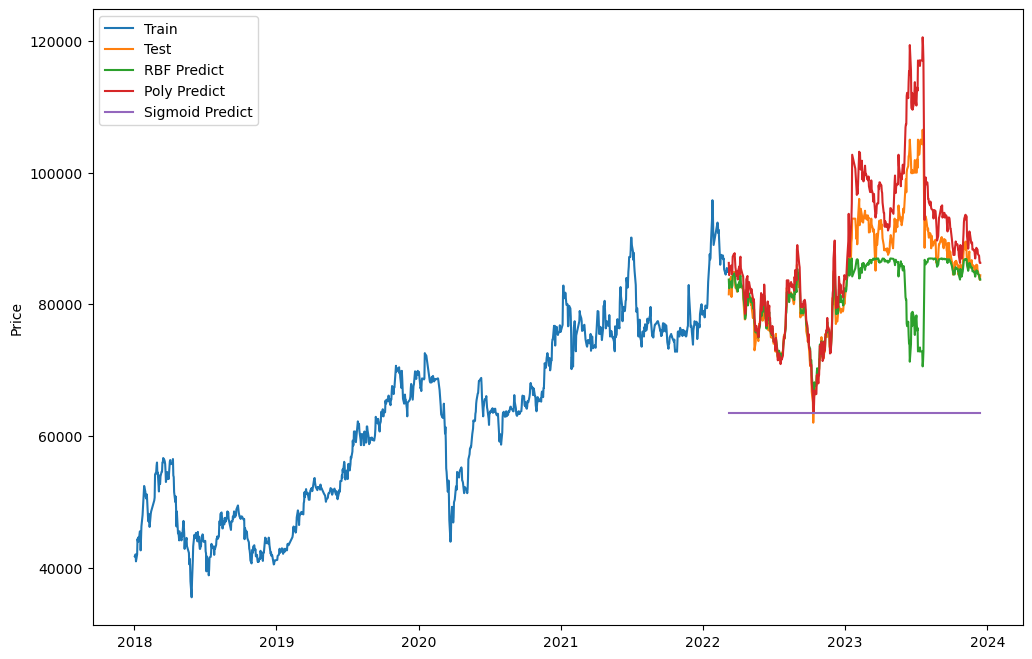

In [46]:
# predict for SVR (7:3)
y_pred_rbf1 = svr_rbf1.predict(X_test1).reshape(-1, 1)

y_pred_poly1 = svr_poly1.predict(X_test1).reshape(-1, 1)

y_pred_sigmoid1 = svr_sigmoid1.predict(X_test1).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train1, label='Train')
plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(X_test1.index, y_pred_poly1, label='Poly Predict')
plt.plot(X_test1.index, y_pred_sigmoid1, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

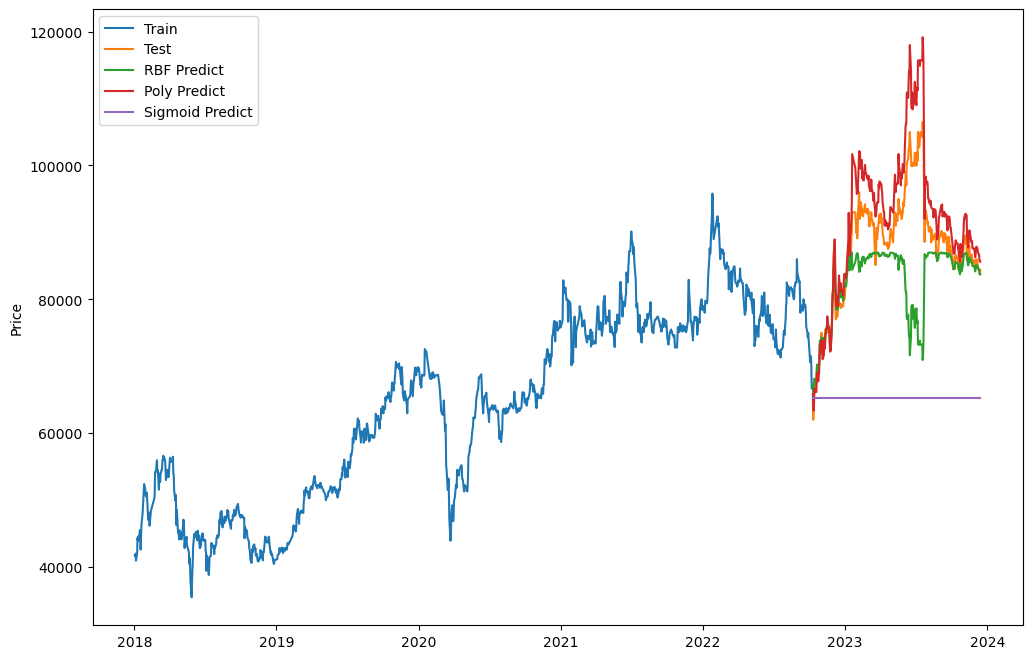

In [47]:
# predict for SVR (8:2)
y_pred_rbf2 = svr_rbf2.predict(X_test2).reshape(-1, 1)

y_pred_poly2 = svr_poly2.predict(X_test2).reshape(-1, 1)

y_pred_sigmoid2 = svr_sigmoid2.predict(X_test2).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train2, label='Train')
plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(X_test2.index, y_pred_poly2, label='Poly Predict')
plt.plot(X_test2.index, y_pred_sigmoid2, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

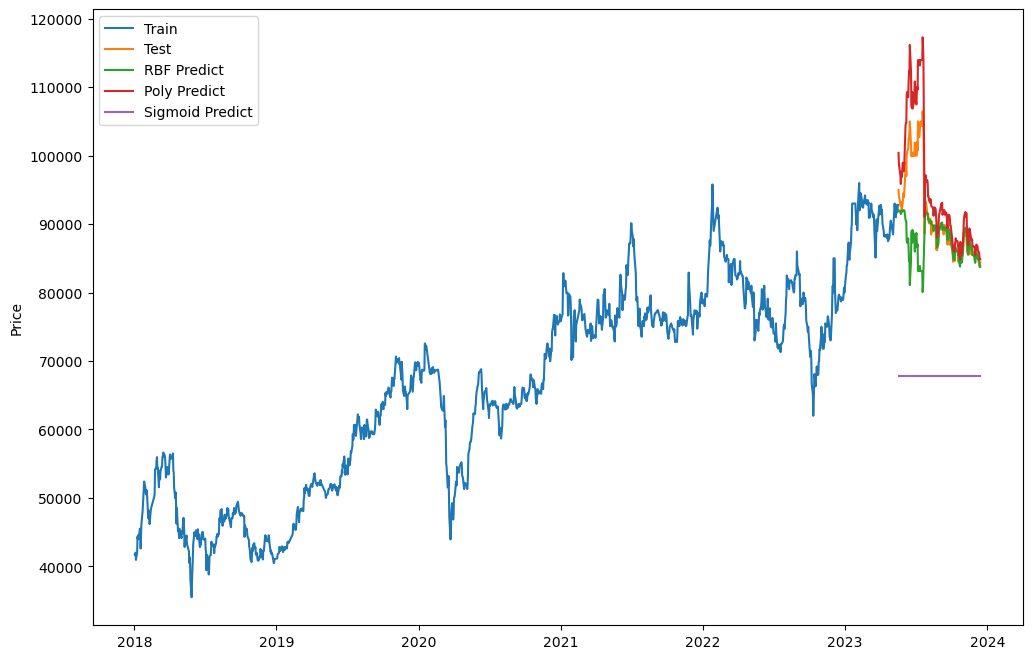

In [48]:
# predict for SVR (9:1)
y_pred_rbf3 = svr_rbf3.predict(X_test3).reshape(-1, 1)

y_pred_poly3 = svr_poly3.predict(X_test3).reshape(-1, 1)

y_pred_sigmoid3 = svr_sigmoid3.predict(X_test3).reshape(-1, 1)

#Visualize
plt.figure(figsize=(12, 8))
plt.plot(y_train3, label='Train')
plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(X_test3.index, y_pred_poly3, label='Poly Predict')
plt.plot(X_test3.index, y_pred_sigmoid3, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
#Take the last data in the dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[84400]])

In [50]:
# Evaluate the accuracy (model 7:3)
mape_rbf1 = mean_absolute_percentage_error(y_test1, y_pred_rbf1) * 100
mae_rbf1 = mae(y_test1, y_pred_rbf1)
test_rmse_rbf1 = np.sqrt(np.mean((y_pred_rbf1 - y_test1)**2))
msle_rbf1 = mean_squared_log_error(y_test1, y_pred_rbf1)

mape_poly1 = mean_absolute_percentage_error(y_test1, y_pred_poly1) * 100
mae_poly1 = mae(y_test1, y_pred_poly1)
test_rmse_poly1 = np.sqrt(np.mean((y_pred_poly1 - y_test1)**2))
msle_poly1 = mean_squared_log_error(y_test1, y_pred_poly1)

mape_sigmoid1 = mean_absolute_percentage_error(y_test1, y_pred_sigmoid1) * 100
mae_sigmoid1 = mae(y_test1, y_pred_sigmoid1)
test_rmse_sigmoid1 = np.sqrt(np.mean((y_pred_sigmoid1 - y_test1)**2))
msle_sigmoid1 = mean_squared_log_error(y_test1, y_pred_sigmoid1)


print("RBF MAPE:\t", mape_rbf1)
print("RBF MSLE:\t", msle_rbf1)
print("RBF MAE: \t",  mae_rbf1)
print("RBF RMSE:\t", test_rmse_rbf1)
print("\n\n")
print("Poly MAPE:\t", mape_poly1)
print("Poly MSLE:\t", msle_poly1)
print("Poly MAE:\t",  mae_poly1)
print("Poly RMSE:\t", test_rmse_poly1)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid1)
print("Sigmoid MSLE:\t", msle_sigmoid1)
print("Sigmoid MAE:\t",  mae_sigmoid1)
print("Sigmoid RMSE:\t", test_rmse_sigmoid1)

RBF MAPE:	 4.121773308534868
RBF MSLE:	 0.008432358916453548
RBF MAE: 	 3916.086258988447
RBF RMSE:	 Price    8073.21767
dtype: float64



Poly MAPE:	 4.210406442413719
Poly MSLE:	 0.002518470334901148
Poly MAE:	 3789.699669468528
Poly RMSE:	 Price    4909.044014
dtype: float64



Sigmoid MAPE:	 24.282764631630315
Sigmoid MSLE:	 0.09026467440357479
Sigmoid MAE:	 21202.106263982103
Sigmoid RMSE:	 Price    22832.419722
dtype: float64


In [51]:
# Evaluate the accuracy (model 8:2)
mape_rbf2 = mean_absolute_percentage_error(y_test2, y_pred_rbf2) * 100
mae_rbf2 = mae(y_test2, y_pred_rbf2)
test_rmse_rbf2 = np.sqrt(np.mean((y_pred_rbf2 - y_test2)**2))

mape_poly2 = mean_absolute_percentage_error(y_test2, y_pred_poly2) * 100
mae_poly2 = mae(y_test2, y_pred_poly2)
test_rmse_poly2 = np.sqrt(np.mean((y_pred_poly2 - y_test2)**2))

mape_sigmoid2 = mean_absolute_percentage_error(y_test2, y_pred_sigmoid2) * 100
mae_sigmoid2 = mae(y_test2, y_pred_sigmoid2)
test_rmse_sigmoid2 = np.sqrt(np.mean((y_pred_sigmoid2 - y_test2)**2))


msle_rbf2 = mean_squared_log_error(y_test2, y_pred_rbf2)
msle_poly2 = mean_squared_log_error(y_test2, y_pred_poly2)
msle_sigmoid2 = mean_squared_log_error(y_test2, y_pred_sigmoid2)


print("RBF MAPE:\t", mape_rbf2)
print("RBF MSLE:\t", msle_rbf2)
print("RBF MAE: \t",  mae_rbf2)
print("RBF RMSE:\t", test_rmse_rbf2)
print("\n\n")
print("Poly MAPE:\t", mape_poly2)
print("Poly MSLE:\t", msle_poly2)
print("Poly MAE:\t",  mae_poly2)
print("Poly RMSE:\t", test_rmse_poly2)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid2)
print("Sigmoid MSLE:\t", msle_sigmoid2)
print("Sigmoid MAE:\t",  mae_sigmoid2)
print("Sigmoid RMSE:\t", test_rmse_sigmoid2)

RBF MAPE:	 5.6772181952631895
RBF MSLE:	 0.01217686618711443
RBF MAE: 	 5468.086268410295
RBF RMSE:	 Price    9728.99965
dtype: float64



Poly MAPE:	 4.5410601884206905
Poly MSLE:	 0.002637764204674292
Poly MAE:	 4177.180841587453
Poly RMSE:	 Price    5083.345612
dtype: float64



Sigmoid MAPE:	 24.954247405213177
Sigmoid MSLE:	 0.09490797068188458
Sigmoid MAE:	 22546.751006711405
Sigmoid RMSE:	 Price    24045.11754
dtype: float64


In [52]:
# Evaluate the accuracy (model 9:1)
mape_rbf3 = mean_absolute_percentage_error(y_test3, y_pred_rbf3) * 100
mae_rbf3 = mae(y_test3, y_pred_rbf3)
test_rmse_rbf3 = np.sqrt(np.mean((y_pred_rbf3 - y_test3)**2))

mape_poly3 = mean_absolute_percentage_error(y_test3, y_pred_poly3) * 100
mae_poly3 = mae(y_test3, y_pred_poly3)
test_rmse_poly3 = np.sqrt(np.mean((y_pred_poly3 - y_test3)**2))

mape_sigmoid3 = mean_absolute_percentage_error(y_test3, y_pred_sigmoid3) * 100
mae_sigmoid3 = mae(y_test3, y_pred_sigmoid3)
test_rmse_sigmoid3 = np.sqrt(np.mean((y_pred_sigmoid3 - y_test3)**2))

msle_rbf3 = mean_squared_log_error(y_test3, y_pred_rbf3)
msle_poly3 = mean_squared_log_error(y_test3, y_pred_poly3)
msle_sigmoid3 = mean_squared_log_error(y_test3, y_pred_sigmoid3)



print("RBF MAPE:\t", mape_rbf3)
print("RBF MSLE:\t", msle_rbf3)
print("RBF MAE: \t",  mae_rbf3)
print("RBF RMSE:\t", test_rmse_rbf3)
print("\n\n")
print("Poly MAPE:\t", mape_poly3)
print("Poly MSLE:\t", msle_poly3)
print("Poly MAE:\t",  mae_poly3)
print("Poly RMSE:\t", test_rmse_poly3)
print("\n\n")
print("Sigmoid MAPE:\t", mape_sigmoid3)
print("Sigmoid MSLE:\t", msle_sigmoid3)
print("Sigmoid MAE:\t",  mae_sigmoid3)
print("Sigmoid RMSE:\t", test_rmse_sigmoid3)

RBF MAPE:	 4.1883156565121515
RBF MSLE:	 0.00765946780888491
RBF MAE: 	 4227.484273399981
RBF RMSE:	 Price    8173.134321
dtype: float64



Poly MAPE:	 4.0249800304979
Poly MSLE:	 0.0022636623922187185
Poly MAE:	 3852.816932950664
Poly RMSE:	 Price    4892.29298
dtype: float64



Sigmoid MAPE:	 25.54131892268923
Sigmoid MSLE:	 0.0929656224930598
Sigmoid MAE:	 23669.889261744967
Sigmoid RMSE:	 Price    24520.855167
dtype: float64


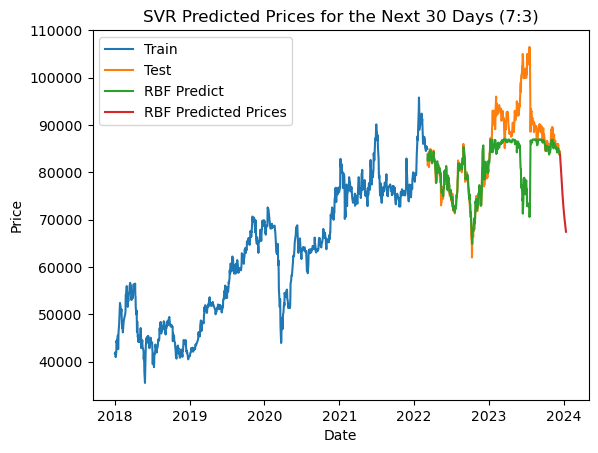

In [53]:
#Predict for next 30 days (7:3)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days1 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str1 = [date.strftime('%Y-%m-%d') for date in next_30_days1]

# Predict values for the next 30 days
x_next_30_day_rbf1 = []
x_next_30_day_poly1 = []
x_next_30_day_sigmoid1 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf1 = svr_rbf1.predict(last_data)[0]
    x_next_30_day_rbf1.append(x_pred_next_rbf1)

    # Predict using Poly model
    x_pred_next_poly1 = svr_poly1.predict(last_data)[0]
    x_next_30_day_poly1.append(x_pred_next_poly1)

    # Predict using Sigmoid model
    x_pred_next_sigmoid1= svr_sigmoid1.predict(last_data)[0]
    x_next_30_day_sigmoid1.append(x_pred_next_sigmoid1)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf1, x_pred_next_poly1, x_pred_next_sigmoid1]).reshape(-1, 1)

# Plot actual and predicted values
plt.plot(y_train1, label='Train')
plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(next_30_days1, x_next_30_day_rbf1, label='RBF Predicted Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (7:3)')
plt.legend()
plt.show()


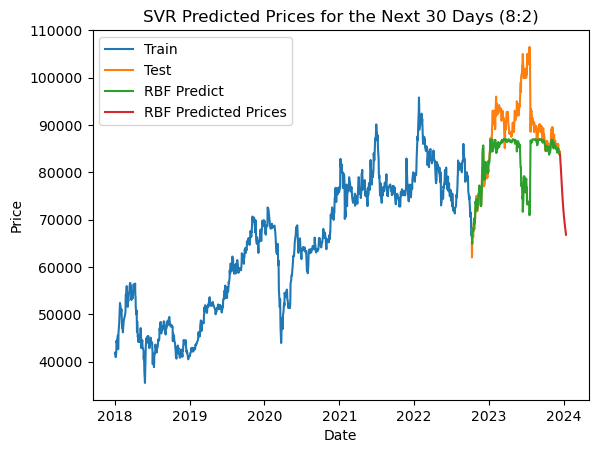

In [54]:
#Predict for next 30 days (8:2)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days2 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str2 = [date.strftime('%Y-%m-%d') for date in next_30_days2]

# Predict values for the next 30 days
x_next_30_day_rbf2 = []
x_next_30_day_poly2 = []
x_next_30_day_sigmoid2 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf2 = svr_rbf2.predict(last_data)[0]
    x_next_30_day_rbf2.append(x_pred_next_rbf2)

    # Predict using Poly model
    x_pred_next_poly2 = svr_poly2.predict(last_data)[0]
    x_next_30_day_poly2.append(x_pred_next_poly2)

    # Predict using Sigmoid model
    x_pred_next_sigmoid2= svr_sigmoid2.predict(last_data)[0]
    x_next_30_day_sigmoid2.append(x_pred_next_sigmoid2)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf2, x_pred_next_poly2, x_pred_next_sigmoid2]).reshape(-1, 1)

# Plot actual and predicted values
plt.plot(y_train2, label='Train')
plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(next_30_days2, x_next_30_day_rbf2, label='RBF Predicted Prices')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (8:2)')
plt.legend()
plt.show()


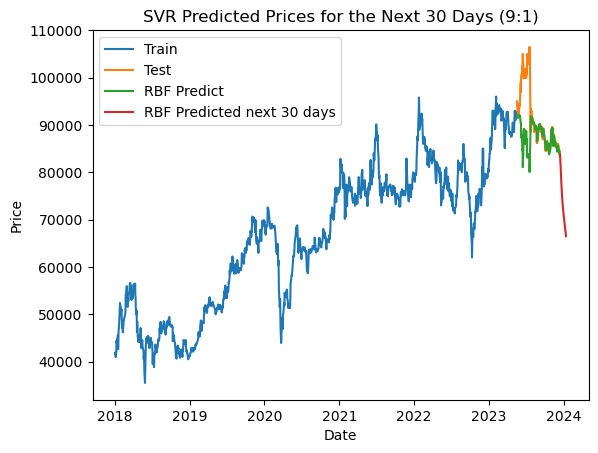

In [55]:
#Predict for next 30 days (9:1)

last_date = df.index[-1]

# Generate dates for the next 30 days
next_30_days3 = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Convert dates to a format compatible with your datetime index (if needed)
next_30_days_str3 = [date.strftime('%Y-%m-%d') for date in next_30_days3]

# Predict values for the next 30 days
x_next_30_day_rbf3 = []
x_next_30_day_poly3 = []
x_next_30_day_sigmoid3 = []

# Use the last known value in your dataset as the starting point
last_data = np.array(df['Price'].iloc[-1]).reshape(-1, 1)

for i in range(30):
    # Predict using RBF model
    x_pred_next_rbf3 = svr_rbf3.predict(last_data)[0]
    x_next_30_day_rbf3.append(x_pred_next_rbf3)

    # Predict using Poly model
    x_pred_next_poly3 = svr_poly3.predict(last_data)[0]
    x_next_30_day_poly3.append(x_pred_next_poly3)

    # Predict using Sigmoid model
    x_pred_next_sigmoid3 = svr_sigmoid3.predict(last_data)[0]
    x_next_30_day_sigmoid3.append(x_pred_next_sigmoid3)

    # Update last_data for the next iteration
    last_data = np.array([x_pred_next_rbf3, x_pred_next_poly3, x_pred_next_sigmoid3]).reshape(-1, 1)

# Plot actual and predicted values
plt.plot(y_train3, label='Train')
plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(next_30_days3, x_next_30_day_rbf3, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (9:1)')
plt.legend()
plt.show()


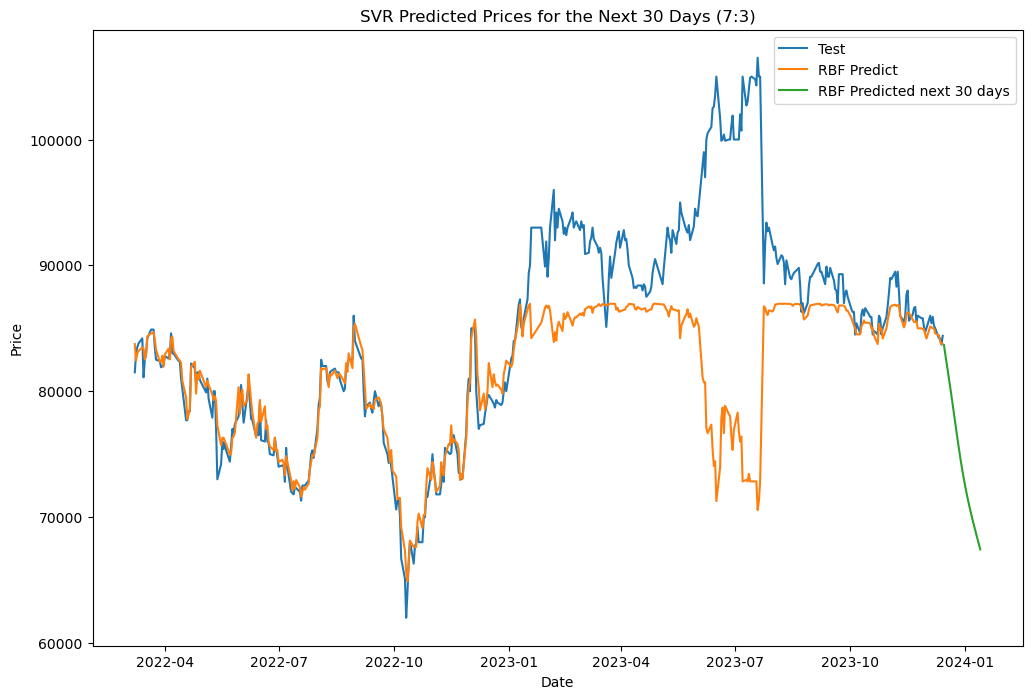

In [56]:
plt.figure(figsize=(12, 8))

plt.plot(y_test1, label='Test')
plt.plot(X_test1.index, y_pred_rbf1, label='RBF Predict')
plt.plot(next_30_days1, x_next_30_day_rbf1, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (7:3)')
plt.legend()
plt.show()

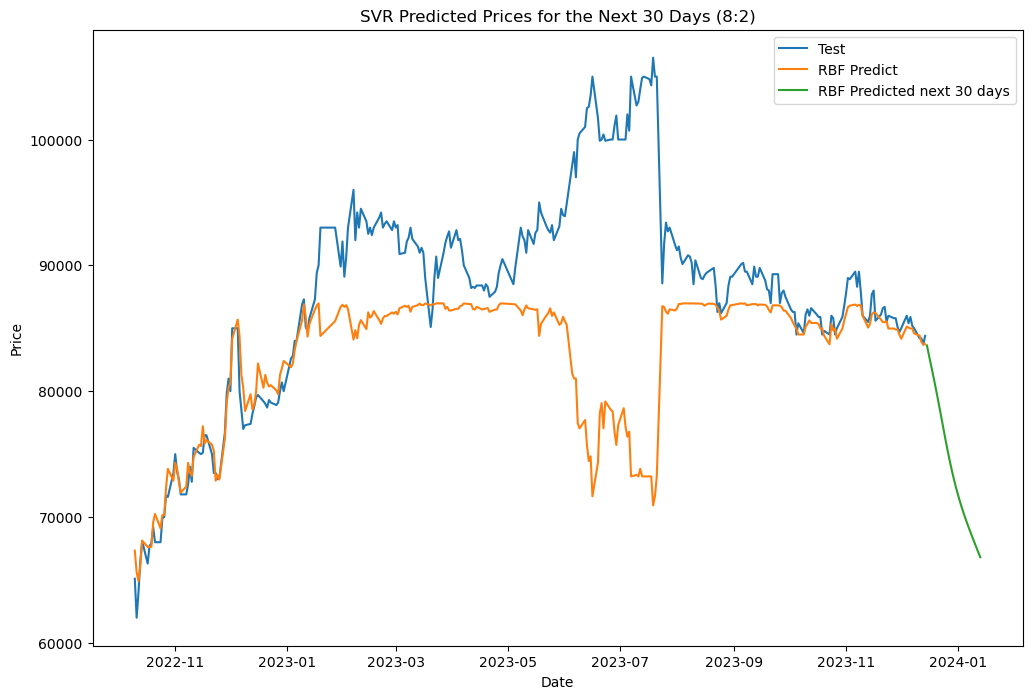

In [57]:
plt.figure(figsize=(12, 8))

plt.plot(y_test2, label='Test')
plt.plot(X_test2.index, y_pred_rbf2, label='RBF Predict')
plt.plot(next_30_days2, x_next_30_day_rbf2, label='RBF Predicted next 30 days')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (8:2)')
plt.legend()
plt.show()

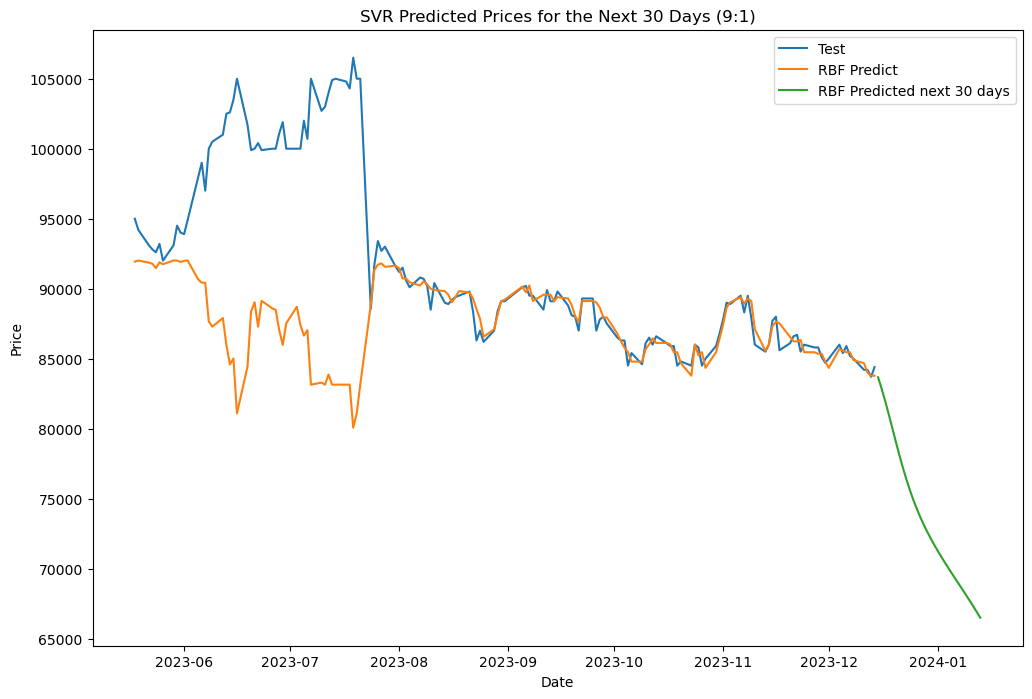

In [58]:
plt.figure(figsize=(12, 8))

plt.plot(y_test3, label='Test')
plt.plot(X_test3.index, y_pred_rbf3, label='RBF Predict')
plt.plot(next_30_days3, x_next_30_day_rbf3, label='RBF Predicted next 30 days')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Predicted Prices for the Next 30 Days (9:1)')
plt.legend()
plt.show()
